# Import your libraries

In [ ]:
import sys
if 'google.colab' in sys.modules:
    print("Running on Google Colab")
    !pip install rich
    #!pip install datasets=="2.9.0"
    # Download gluon 
    #!pip3 install -U pip
    #!pip3 install -U setuptools wheel
    #!pip3 install autogluon
    #!pip show autogluon
else:
    print("Not running on Google Colab")
from rich import print

# Numpy
- Module to provide support for arrays, which don’t exist in base Python
- Used by nearly every other module in Python

In [ ]:
import numpy as np
print(f"Numpy: {np.version.version}")
my_array = np.array([1, 2, 3, 4, 5] , dtype = np.int8)
print(f"Number of dimensions: {my_array.ndim}")
print(f"Shape of array: {my_array.shape}")
print(f"Arary DataType: {my_array.dtype}")

my_2d_array = np.array([[1, 2, 3], [4, 5, 6]] , dtype = np.int8)
print(f"Number of dimensions: {my_2d_array.ndim}")
print(f"Shape of array: {my_2d_array.shape}")
print(f"Arary DataType: {my_2d_array.dtype}")

# Pandas

In [ ]:
# Pandas example
import pandas as pd

# Create a DataFrame
data = {'Name':['John', 'Anna', 'Peter', 'Linda'],
        'Location':['New York', 'Paris', 'Berlin', 'London'],
        'Age':[24, 13, 53, 33]
       }

df = pd.DataFrame(data)
print("The DataFrame is:")
print(df)

# Select a column
print("The element in the column 'Name' is:")
print(df['Name'])

# Select multiple columns
print("The element in the columns 'Name' and 'Location' is:")
print(df[['Name', 'Location']])

# Select rows by index
print("The element in the first row is:")
print(df.loc[0])

# Select rows by condition
print("The element in the rows where 'Age' is greater than 30 is:")
print(df[df['Age'] > 30])

# A SQR query on the pandas DataFrame
print("The element in the rows where 'Age' is greater than 30 is:")
print(df.query('Age > 30'))

# SciPy
1. Optimization 

In [ ]:
# SciPy example
import scipy.optimize as opt
import seaborn as sns

# Define the function to be minimized
def f(x):
    return x**2 + 10*np.sin(x)
## Create a seaborn plot of the function abov
sns.lineplot(x=np.arange(-10,10,0.1), y=f(np.arange(-10,10,0.1)))


# Call the optimize function
result = opt.minimize(f, x0=0)

# Print the results
print(result)

# Matplotlib
1. Mathplotlib is a plotting library for the Python programming language

## Install Matplotlib

In [ ]:
if "google.colab" in sys.modules:
    !pip install -U matplotlib
    #!pip install imagemagick

## Create a Matplolib Plot

In [ ]:
# Matplotlib example
import matplotlib.pyplot as plt

# Create a simple line plot
x = [1,2,3,4,5]
y = [1,4,9,16,25]
plt.plot(x,y)
plt.show()

# Create a scatter plot
x = [1,2,3,4,5]
y = [1,4,9,16,25]
plt.scatter(x,y)
plt.show()

# Create a bar chart
x = [1,2,3,4,5]
y = [1,4,9,16,25]
plt.bar(x,y)
plt.show()
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

## Create an animation plot with Matplotlib

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.
x = np.arange(0, 20, 0.1)
ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
line, = ax.plot(x, x - 5, 'r-', linewidth=2)

def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata(x - 5 + i)
    ax.set_xlabel(label)
    return line, ax

# FuncAnimation will call the 'update' function for each frame; here
# animating over 10 frames, with an interval of 200ms between frames.
anim = FuncAnimation(fig, update, frames=np.arange(0, 10), interval=200)
try:
    anim.save('line.gif', dpi=80, writer='imagemagick')
except TypeError as e:
    print(e)
    print('Try installing imagemagick with:')
    print('  conda install -c conda-forge imagemagick')
    print('or')
    print('  pip install imagemagick')
# plt.show() will just loop the animation forever.
plt.show()

# Scikit Learn on the Iris Dataset
1. Download the Iris Dataset
- Iris dataset: classic ML benchmark for classifying iris species based on sepal/petal measurements
- 150 observations of 3 iris species (50 each)
- Goal is to train a machine learning model to accurately predict the species of an iris flower based on sepal and petal measurements
2. Split the dataset into training and testing sets where 80% of the data is used for training and 20% for testing
3. Train a Decision Tree Classifier on the training set
4. Evaluate the model on the testing set and display the confusion matrix

In [ ]:
# Scikit-learn example
from rich import print
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
# Load the iris dataset
iris = load_iris()
print(iris.feature_names)
X = iris.data
print(iris.target_names)
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## The size of the training and test sets
print(X_train.shape)
print(X_test.shape)

# Train the model
decision_tree_classifier = DecisionTreeClassifier( max_depth=2)
decision_tree_classifier.fit(X_train, y_train)

# Predict the test set

predictions = decision_tree_classifier.predict(X_test)

# Evaluate the model
accuracy = decision_tree_classifier.score(X_test, y_test)

print("The accuracy of the model is: ", accuracy)


# Plot the confusion matrix

cm = confusion_matrix(y_test, predictions ,  labels=decision_tree_classifier.classes_)


## display the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=decision_tree_classifier.classes_)



disp.plot()

### Display Decision Tree Classifier

In [ ]:
tree.plot_tree( decision_tree_classifier , feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

# XGBoost
1. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is tabular dataset better than Deep Neural Network (DNN)

In [ ]:
from xgboost import XGBClassifier
# read data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()
print(data["data"].shape )
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=.3)
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
predictions = bst.predict(X_test)
print(predictions)
print(y_test)
score = bst.score(X_test, y_test)
print(score)
cm = confusion_matrix(y_test, predictions, labels=decision_tree_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=decision_tree_classifier.classes_)
disp.plot()

# Spacy 

# Install Spacy and download the English language model


In [ ]:
if "google.colab" in sys.modules:
    !pip install spacy

## Spacy Part of Speech Tagging

In [ ]:
import spacy
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Rich example
from rich.console import Console
from rich.table import Table

# Create a table
table = Table(title="Spacu Part of Speech Tagging")
table.add_column("Text", justify="center", style="cyan")
table.add_column("lemma", justify="center")
table.add_column("pos", justify="center")
table.add_column("tag", justify="center")
table.add_column("dependency", justify="center")
for token in doc:
    #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
    #        token.shape_, token.is_alpha, token.is_stop)
    table.add_row(token.text, token.lemma_, token.pos_, token.tag_, token.dep_)

# Print the table
console = Console()
console.print(table)
## === We can also use displacy to render the dependency graph ===

if "google.colab" in sys.modules:
    displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})
else:
    displacy.render(doc, style="dep")

## Spacy Named Entity Recognition


In [ ]:
import spacy
from spacy import displacy

text = "When Sebastian Thrun started working on self-driving cars at Google in 2007, few people outside of the company took him seriously."

doc = nlp(text)
if "google.colab" in sys.modules:
    displacy.render(doc, style='ent', jupyter=True, options={'distance': 90})
else:
    displacy.render(doc, style="ent")

# Datasets

# Install Dataset Libraries

In [ ]:
import sys
if "google.colab" in sys.modules:
  !pip install rich 
  !pip install datasets=="2.9.0"
from datasets import list_datasets, load_dataset
from rich import print
# Print all the available datasets
print(list_datasets()[:5])   

## Download Text Classfication Dataset 

In [ ]:
from datasets import load_dataset



tweet_eval_emotion = load_dataset("tweet_eval", "emotion")

## Peek at the dataset
print(tweet_eval_emotion)

# Print the first example from the training set
print(tweet_eval_emotion["train"][0])

# Print the the labels of the dataset
print( tweet_eval_emotion["train"].features)



## Stream Code from Huggging Face
1. The dataset is over 100 GB, the only way to use the dataset is to stream it from Hugging Face's Dataset

In [16]:
from datasets import load_dataset
from rich.pretty import pprint

ds = load_dataset("codeparrot/github-code", streaming=True, split="train")
pprint(next(iter(ds)))
pprint(next(iter(ds)))
pprint(next(iter(ds))["code"])

KeyboardInterrupt: 

## Computer Vision Dataset on HG

In [17]:
from datasets import load_dataset


pokemon_dataset = load_dataset("keremberke/pokemon-classification" , "mini" , split="train")
print(pokemon_dataset)

Found cached dataset pokemon-classification (/home/null/.cache/huggingface/datasets/keremberke___pokemon-classification/mini/1.0.0/5193d0f863ed08164636296506df483caa6c9965bc05198ec2136417398e4b28)


Dataset({
    features: ['image_file_path', 'image', 'labels'],
    num_rows: 70
})

The image does work

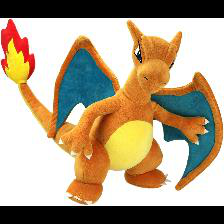

In [24]:
# View the PIL.JpegImage
from PIL import Image
image = None
try:
    image = Image.open(pokemon_dataset[2]["image_file_path"])
    print(f"The image does work")
except Exception as e:
    print("The image does not work")
    print(e)
image

## Audio Dataset on HG
1. LibriSpeech is a standard large-scale dataset for evaluating ASR systems. It consists of approximately 1,000 hours of narrated audiobooks collected from the LibriVox project. LibriSpeech has been instrumental in facilitating researchers to leverage a large body of pre-existing transcribed speech data. As such, it has become one of the most popular datasets for benchmarking academic speech systems.
2. The dataset is huge so we have to stream which is common for audio datasets
3. To learn more about [Audio Dataset on Hugging Face Hub](https://huggingface.co/blog/audio-datasets#easy-to-load-easy-to-process)


In [ ]:
from datasets import load_dataset, Audio

librispeech = load_dataset("librispeech_asr", "clean" , streaming = True)




#import IPython.display as ipd
#ipd.Audio('audio/conga_groove.wav') # load a local WAV file

In [ ]:
first_examle = next(iter(librispeech))
print(first_examle)
second_example = next(iter(librispeech))
print(second_example)

# Tensorflow 

## How to to classify images using TensorFlow Keras
1.  Download a Cifar 10 Dataset from [here](https://www.cs.toronto.edu/~kriz/cifar.html)
2. Create Multi-Layer Perceptron (MLP) model using Tensorflow Keras
3. Train the MLP model using the Cifar 10 Dataset 

In [ ]:
# TensorFlow example
import tensorflow as tf
cifar_10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) =  cifar_10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
## Create a MLP where the first layer is a Flatten layer has 32 * 32 * 3 = 3072 neurons
## The second layer has 128 neurons and the last layer has 10 neurons
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape= (32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
##  If you are using a gpu then remove the model from gpu use. 
tf.keras.backend.clear_session()

# PyTorch 
1. PyTorch is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab (FAIR). It is free and open-source software released under the Modified BSD license.

## Use PyTorch to Classify the Same Dataset which is Cifar10
1. Download the same Cifar 10 Dataset from [here](https://www.cs.toronto.edu/~kriz/cifar.html)
2. Create a Convoluted Neural Network (CNN) model using PyTorch
3. Train the CNN model using the Cifar 10 Dataset
    3.1 Set the Optimizer to SGD
    3.2 Set the Loss Function to Cross Entropy Loss

### Createa the Neural Network Model

In [ ]:
# PyTorch example
import torch
import torch.nn as nn
import torchvision 
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F


# Create a MLP where the first layer is a Flatten layer has 32 * 32 * 3 = 3072 neurons
# The second layer has 128 neurons and the last layer has 10 neurons
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32*32*3, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )
    def forward(self, x):
        return self.model(x)

In [ ]:

net = Net()
# Transform the data to tensors and normalize the data to have mean 0 and std 1
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 32
# Load the data and feed into a dataloader
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
# The classes of the dataset
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Define the loss function 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW( net.parameters()  )

# Train the model
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the gradients before running the backaward pass
        optimizer.zero_grad()
        # ===================forward=====================
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        # ===================backward====================
        
        #Backward pass to compte teh gradients of loow.wrt our learable param
        loss.backward()
        
        # Update the Pararameters
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

# GPU check
First, please make sure you are using a GPU runtime to run this notebook, so inference is much faster. If the following command fails, use the `Runtime` menu above and select `Change runtime type`.
- This is necssary to run the code in this notebook becuase PyTorch and Tensorflow are GPU accelerated libraries

In [ ]:
## Enable CuDNN auto-tuner
import torch
if torch.cuda.is_available():
    torch.backends.cudnn.benchmark = True
## Use tf32 insteadf of fp32 ( on Ampere GPUs) and later Cuda Devices
import torch
if torch.cuda.is_available():
    torch.backends.cuda.matmul.allow_tf32 = True

# Set the seed for reproducibility

In [ ]:
def seed_everything(seed: int):
    import random, os
    import numpy as np
    import torch
    
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = True
seed_everything(42)

# Auto ML Libraries

## Optuna

###  Install Optuna

In [ ]:
import sys
if "google.colab" in sys.modules:
    try:
        !pip install optuna
        !pip install numpy
    except Exception as e:
        print(e)
        print("There was an error installing optuna")
        pass

### Use Optuna to find the minimum of a function

In [ ]:
import optuna
import seaborn as sns
import numpy as np
# Define the function to be minimized
def f(x):
    return x**2 + 10*np.sin(x)
## Create a seaborn plot of the function abov
def objective(trial):
    x = trial.suggest_float('x', -10, 10)
    return f(x)

study = optuna.create_study( direction = "minimize" )
study.optimize(objective, n_trials = 10 ) 

list_of_element = []
for x in study.trials:
    list_of_element.append( x.params["x"]  ) 

print( study.best_params ) # E.g. {'x': 2.002108042} 



sns.lineplot(x=np.arange(-10,10,0.1), y=f(np.arange(-10,10,0.1)))
## add the points in the lines
for index  , x in enumerate ( list_of_element ) :
    ## add the number in the problem 
    #plt.text(x, f(x), str(x), fontsize=10)
    print( index ) 
    plt.text(x, f(x), str( index + 1), fontsize=10)
    plt.scatter(x, f(x) , color='red' , s= 100)

### Apply Optuna on PyTorch to Classify the Same Dataset which is Cifar10

In [ ]:
import torch

import optuna
''' Work on it Later
# 1. Define an objective function to be maximized.
def objective(trial):

    # 2. Suggest values of the hyperparameters using a trial object.
    n_layers = trial.suggest_int('n_layers', 1, 3)
    layers = []

    in_features = 32 * 32 * 3
    for i in range(n_layers):
        out_features = trial.suggest_int(f'n_units_l{i}', 4, 128)
        layers.append(torch.nn.Linear(in_features, out_features))
        layers.append(torch.nn.ReLU())
        in_features = out_features
    layers.append(torch.nn.Linear(in_features, 10))
    layers.append(torch.nn.LogSoftmax(dim=1))
    model = torch.nn.Sequential(*layers).to(torch.device('cpu'))
    
    ## loop over the dataset multiple times
    for epoch in range(2):  
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data


            # ===================forward=====================
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            # ===================backward====================
            # zero the gradients before running the backaward pass
            optimizer.zero_grad()

            #Backward pass to compte teh gradients of loow.wrt our learable param
            loss.backward()

            # Update the Pararameters
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
        ## evlauation of the loop 
        with torch.no_grad():
            accuracy = 0
            for data, target in testloader:
                output = model(data)
                accuracy += output.argmax(dim=1).eq(target).sum().item() / len(target)
                
    
    return accuracy

# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
'''

## [Gluon](https://auto.gluon.ai/)
- MultiModalPredictor.load() used pickle module implicitly, which is known to be insecure. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling. Never load data that could have come from an untrusted source, or that could have been tampered with. Only load data you trust.

# Install Gluon

In [ ]:
import sys
if "google.colab" in sys.modules:
    try:
        !pip3 install -U setuptools wheel
        !pip3 install autogluon
        !pip show autogluon
    except:
        print("Error installing autogluon")
        pass

In [ ]:
%matplotlib inline
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
np.random.seed(123)

from autogluon.core.utils.loaders import load_pd
if torch.cuda.is_available():
    train_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/train.parquet')
    test_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/dev.parquet')
    subsample_size = 1000  # subsample data for faster demo, try setting this to larger values
    train_data = train_data.sample(n=subsample_size, random_state=0)
    train_data.head(10)
    # ====================== Text Classification with with MultoModalPredictor ======================
    from autogluon.multimodal import MultiModalPredictor
    import uuid
    model_path = f"./tmp/{uuid.uuid4().hex}-automm_sst"
    predictor = MultiModalPredictor(label='label', eval_metric='acc', path=model_path)
    predictor.fit(train_data, time_limit=180)
    # ====================== Evaluate the predictor ======================
    test_score = predictor.evaluate(test_data)
    print(test_score)
    test_score = predictor.evaluate(test_data, metrics=['acc', 'f1'])
    print(test_score)
    sentence1 = "it's a charming and often affecting journey."
    sentence2 = "It's slow, very, very, very slow."
    predictions = predictor.predict({'sentence': [sentence1, sentence2]})
    print('"Sentence":', sentence1, '"Predicted Sentiment":', predictions[0])
    print('"Sentence":', sentence2, '"Predicted Sentiment":', predictions[1])
else:
    print("CUDA is not available. Skip this example.")

# [Timm](https://huggingface.co/timm)


## Install Timm library

In [ ]:
import sys
if "google.colab" in sys.modules:
    !pip install timm

## Download a pretrain CV from Timm Hugging Face Hub to classify an Image

In [ ]:
from urllib.request import urlopen
from PIL import Image
import timm
import torch
import requests
from PIL import Image
from io import BytesIO
url = 'https://datasets-server.huggingface.co/assets/imagenet-1k/--/default/test/12/image/image.jpg'
image = Image.open(requests.get(url, stream=True).raw)
model = timm.create_model('mobilenetv3_large_100', pretrained=True).eval()
transform = timm.data.create_transform(
    **timm.data.resolve_data_config( model.pretrained_cfg ))
# == We can preapre this image for the model by passing it through the transform ==
image_tensor = transform(image)
print( image_tensor.shape ) 
# == Now we can pass that image ot th emodel to get the predictsions. We use unsqueeze to add a batch dimension ==
output = model(image_tensor.unsqueeze(0))
print( output.shape )
## === We can use softmax to get the probabilities for each class and this leaves us with a tensor of shape ( num_classes, ) ==
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print( probabilities.shape ) 
# == We can use the torch.topk function to get the top 5 predictions ==
values, indices = torch.topk(probabilities, 5)
print( indices)
# == We can use the timm.utils.decode_predictions function to get the class names for the top 5 predictions ==


In [ ]:
IMAGENET_1k_URL = 'https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt'
IMAGENET_1k_LABELS = requests.get(IMAGENET_1k_URL).text.strip().split('\n')
[{'label': IMAGENET_1k_LABELS[idx], 'value': val.item()} for val, idx in zip(values, indices)]

<!--Copyright 2022 The HuggingFace Team. All rights reserved.

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with
the License. You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on
an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the
specific language governing permissions and limitations under the License.
-->

<p align="center">
    <br>
    <img src="https://raw.githubusercontent.com/huggingface/diffusers/77aadfee6a891ab9fcfb780f87c693f7a5beeb8e/docs/source/imgs/diffusers_library.jpg" width="400"/>
    <br>
</p>

# 🧨 Diffusers

🤗 Diffusers provides pretrained vision and audio diffusion models, and serves as a modular toolbox for inference and training.

More precisely, 🤗 Diffusers offers:

State-of-the-art diffusion pipelines that can be run in inference with just a couple of lines of code (see Using Diffusers) or have a look at Pipelines to get an overview of all supported pipelines and their corresponding papers.
Various noise schedulers that can be used interchangeably for the preferred speed vs. quality trade-off in inference. For more information see Schedulers.
Multiple types of models, such as UNet, can be used as building blocks in an end-to-end diffusion system. See Models for more details
Training examples to show how to train the most popular diffusion model tasks. For more information see Training.

## Download Stable Diffusion model to generate an Image
1. It takes atleast 3 minutes to download the stable diffusion model from the Hugging Face Hub. However, it will download the model to your local machine so you can use it offline.

### Installtion for Stable Diffusion

In [ ]:
## on google 
if "google.colab" in sys.modules:
    ## Install Xformer
    !pip install pyre-extensions==0.0.23
    !pip install -i https://test.pypi.org/simple/ formers==0.0.15.dev376
    # Install Diffusion
    !pip install diffusers[torch]==0.11.1 transformers scipy ftfy accelerate

### Run the Stable Diffusion Model Pipeline

In [ ]:
from diffusers import StableDiffusionPipeline                                                                                                                                                                                                 
import torch
import time
if torch.cuda.is_available():
    model_id = "runwayml/stable-diffusion-v1-5"                                                                                                                                                                                                                                                                                                                                                                                                                                                 
    #The default run we did above used full float32 precision and ran the default number of inference steps (50). The easiest speed-ups come from switching to float16 (or half) precision and simply running fewer inference steps. Let’s load the model now in float16 instead.
    start_time = time.time()
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)                                                                                                                                                                                    
    print(f"Loaded model in {time.time() - start_time:.2f} seconds")
    prompt = "portrait photo of a old warrior chief"   
    pipe = pipe.to( "cuda" if torch.cuda.is_available() else "cpu" )
    ## There’s a small performance penalty of about 10% slower inference times, but this method allows you to use Stable Diffusion in as little as 3.2 GB of VRAM!
    pipe.enable_attention_slicing()
    generator = torch.Generator("cuda" if torch.cuda.is_available() else "cpu").manual_seed(0)   
    image = pipe(prompt, generator=generator).images[0]                                                                                                                                                                                           
    image                                                                                                                                                                                                                                         


### Create your own prompt is you have Cuda GPU
1. You are looking for a [prmopt generator](https://huggingface.co/spaces/doevent/Stable-Diffusion-prompt-generator)

In [ ]:
if torch.cuda.is_avaible():
    
    prompt = """
    For the apocalypse, Ilya Kuvshinov, digital, concept art, Kyoto animation,last exile, blue submarine no. 6, gustav klimt,loish, murata range, kawaii, yoshitaka amano, studio lighting, manga, bright colors, beautiful, 28mm lens,mucha, vibrant high contrast, gradation, jean giraud, fantasy, rule of

    For the apocalypse, RPG Reference, Oil Painting, Trending on Artstation, octane render, Insanely Detailed, 8k, HD

    For the apocalypse there is a lake, full of fire, and a handsome blond male knight in epic steampunk armor, in silent hill valley, symmetrical face, golden hour, epic scene, by craig mullins, jaime jones, greg rutkowski, giger, maxim verehin
    """
    image = pipe(prompt, generator=generator).images[0]                                                                                                                                                                                          

### How big can your batch size be in your Diffusion Model for your given GPU during inference?
Less memory used in generation indirectly implies more speed, since we’re often trying to maximize how many images we can generate per second. Usually, the more images per inference run, the more images per second too.

The easiest way to see how many images we can generate at once is to simply try it out, and see when we get a “Out-of-memory (OOM)” error.

We can run batched inference by simply passing a list of prompts and generators. Let’s define a quick function that generates a batch for us.### See how 

In [ ]:
def get_inputs(batch_size=1):                                                                                                                                                                                                                 
  generator = [torch.Generator("cuda").manual_seed(i) for i in range(batch_size)]                                                                                                                                                             
  prompts = batch_size * [prompt]                                                                                                                                                                                                             
  num_inference_steps = 20                                                                                                                                                                                                                    

  return {"prompt": prompts, "generator": generator, "num_inference_steps": num_inference_steps} 
from PIL import Image                                                                                                                                                                                                                         
'''
This function returns a list of prompts and a list of generators, so we can reuse the generator that produced a result we like.

We also need a method that allows us to easily display a batch of images.
'''
def image_grid(imgs, rows=2, cols=2):                                                                                                                                                                                                         
    w, h = imgs[0].size                                                                                                                                                                                                                       
    grid = Image.new('RGB', size=(cols*w, rows*h))                                                                                                                                                                                            
                                                                                                                                                                                                                                              
    for i, img in enumerate(imgs):                                                                                                                                                                                                            
        grid.paste(img, box=(i%cols*w, i//cols*h))                                                                                                                                                                                            
    return grid

# Hugging Face Libraries 

## NLP

### Zero Shot Classification Text Classification on 14 different Languages
- XNLI is a subset of a few thousand examples from MNLI which has been translated into a 100 different languages (some low-ish resource). As with MNLI, the goal is to predict textual entailment (does sentence A imply/contradict/neither sentence B) and is a classification task (given two sentences, predict one of three labels).[1]

In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli")

sequence_to_classify = "Angela Merkel ist eine Politikerin in Deutschland und Vorsitzende der CDU"
candidate_labels = ["politics", "economy", "entertainment", "environment"]
output = classifier(sequence_to_classify, candidate_labels, multi_label=False)
print(output)


### Summarization

In [ ]:
SUMMARY_TEXT_SAMPLE = "The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building, and the tallest structure in Paris. Its base is square, measuring 125 metres (410 ft) on each side. During its construction, the Eiffel Tower surpassed the Washington Monument to become the tallest man-made structure in the world, a title it held for 41 years until the Chrysler Building in New York City was finished in 1930. It was the first structure to reach a height of 300 metres. Due to the addition of a broadcasting aerial at the top of the tower in 1957, it is now taller than the Chrysler Building by 5.2 metres (17 ft). Excluding transmitters, the Eiffel Tower is the second tallest free-standing structure in France after the Millau Viaduct."
# use bart in pytorch
from transformers import pipeline
'''
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
'''
default_hg_summarizer = pipeline("summarization")
print( default_hg_summarizer(SUMMARY_TEXT_SAMPLE) ) 

### Fine Tune a small BERT on Tweet Eval emotion Subset dataset

In [ ]:
from datasets import load_dataset


dataset = load_dataset("tweet_eval", "emotion")
print(dataset["train"][0])
print(dataset)

from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("neuralmagic/oBERT-3-upstream-pretrained-dense" )

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

tokenized_dataset = dataset.map(preprocess_function, batched=True)

model = AutoModelForSequenceClassification.from_pretrained("neuralmagic/oBERT-3-upstream-pretrained-dense" , num_labels = 4)

## Calling the training arguments 
from transformers import TrainingArguments , Trainer
training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset = tokenized_dataset["train"],
    tokenizer=tokenizer,
)
trainer.train()

    


# Rich

In [ ]:

# Rich example
from rich.console import Console
from rich.table import Table

# Create a table
table = Table(title="Machine Learning Libraries")
table.add_column("Name", justify="center", style="cyan")
table.add_column("Description", justify="center")

# Add rows to the table
table.add_row("TensorFlow", "Dataflow and differentiable programming")
table.add_row("Scikit-learn", "Classification, regression and clustering algorithms")
table.add_row("PyTorch", "Computer vision and natural language processing")
table.add_row("Numpy", "High-performance multidimensional array object")
table.add_row("Matplotlib", "Plotting library for Python")
table.add_row("Pandas", "Data structures and data analysis tools")
table.add_row("SciPy", "Algorithms and mathematical tools")
table.add_row("Rich", "Building command-line applications")

# Print the table
console = Console()
console.print(table)